# Advising Restaurants on How to Improve Customer Reviews Using Multiple Linear Regression on Yelp Review Data

## Overview of Project

This project uses yelp data to explore a variety of factors related to individual restaurants' customer reviews. We will explore the data and identify factors relevant to the average rating for individual restaurants, using those factors as variables to train a multiple linear regression model. Once trained, our goal is for this model to be able to predict the rating of a restaurant. The regression coefficient for individual variables will tell us how important they are to restaurant success, as reflected by their customer reviews. Based on this, we can advise our client (a restaurant that wants to improve its customer reviews) on what is most valuable to change for long term growth. 

This is one effective way to take known data and use it, along with machine learning tools, to generate actionable insights for businesses.

## Plan
We plan to:
* prepare, clean, and merge available data as needed
* perform exploratory analysis to determine relevant features of the data
* split data into a training set (to teach our regression model how to make predictions from our chosen variables) and a test set (to verify the accuracy of our model)
* train and test a multiple linear regression model to predict restaurant ratings
* evaluate model accuracy - refine as needed
* summarize actionable insights for our clients

**Questions we want to answer**: How can restaurants improve their yelp reviews? Which changes will be the most effective for the least amount of cost/effort? Could our model reveal possible actions our client can take to improve their restaurant?

## Part 1 - Loading (and visualizing) the data

**First**, we will load the available data:

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data_path = 'data/' #need to first enter the folder that stores all of our data

#load all individual tables
#location and attributes
dat_business = pd.read_json(data_path + 'yelp_business.json', lines=True) 
#online check-in data
dat_checkin = pd.read_json(data_path + 'yelp_checkin.json', lines=True)
#????
dat_maindata = pd.read_json(data_path + 'yelp_data.json', lines=True)
#photo metadata
dat_photo = pd.read_json(data_path + 'yelp_photo.json', lines=True)
#review metadata
dat_review = pd.read_json(data_path + 'yelp_review.json', lines=True)
#tip metadata
dat_tip = pd.read_json(data_path + 'yelp_tip.json', lines=True)
#user profile data
dat_user = pd.read_json(data_path + 'yelp_user.json', lines=True)


In [4]:
#here, we're just adjusting the display for our dataframes. We need to clearly see what information each table contains!
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

**What does our data look like?** Our first table, and perhaps the most dense in terms of variables that may be relevant for yelp reviews, is information about the individual businesses. 

In [6]:
print('business data table: \n')
dat_business.head(3) #will display automatically in jupyter, need print() for regular python file

business data table: 



,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0


In [7]:
print('checkin data: \n')
dat_checkin.head(3)

checkin data: 



,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3


In [8]:
print('photo data: \n')
dat_photo.head(3)

photo data: 



,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136


In [9]:
print('review data: ')
dat_review.head()

review data: 


,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [10]:
print('tip data: ')
dat_tip.head()

tip data: 


,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [11]:
print('user data: ')
dat_user.head()

user data: 


,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


**After inspection,** the tables with the most relevant information are the **"business"** and the **"review"** tables. Let's merge them to get one table with everything we need. We'll use a left merge, so that every business is represented in the final table, even if there is no matching row in the review data:

In [13]:
fulldat = pd.merge(dat_business, dat_review, how='left', on='business_id') #this will merge the business and reviews tables as desired
print('Length of columns in the table: ', len(fulldat))

#how many unique business_id?
print('Number of unique business in the table: ', fulldat['business_id'].nunique())

Length of columns in the table:  188593
Number of unique business in the table:  188593


So, we now have a table with **all of the relevant business information** and **all of the relevant review information** with one row for each unique business. If we found anything useful in the other data frames, we could uncomment the following lines to merge those as well:

In [15]:
fulldat = pd.merge(fulldat, dat_checkin, how='left', on='business_id') #merge the checkin data
fulldat = pd.merge(fulldat, dat_user, how='left', on='business_id') #merge the user data
fulldat = pd.merge(fulldat, dat_photo, how='left', on='business_id') #merge the photo data
fulldat = pd.merge(fulldat, dat_tip, how='left', on='business_id') #merge the tip data

And with our master dataframe, let's inspect the final structure of our table:

In [17]:
fulldat.head(1)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,time,weekday_checkins,weekend_checkins,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,average_caption_length,number_pics,average_tip_length,number_tips
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1,618.25,532.916667,0.865342,6,5,13,"{'Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1': 1, 'Fri-16': 1, 'Tue-17': 1, 'Sat-18': 1, 'Tue-18': 2, 'Wed-18': 1, 'Fri-19': 2, 'Thu-19': 2, 'Sat-20': 3, 'Thu-20': 1, 'Tue-20': 1, 'Sat-21': 2, 'Tue-21': 1, 'Fri-22': 1, 'Sat-22': 1, 'Thu-22': 1, 'Fri-23': 1, 'Sat-23': 1}",11.0,18.0,42.833333,1809.375,5.375,114.875,1.125,NaN,NaN,38.0,6.0


## Part 2 - Cleaning and Preparing the Data

In order to perform multiple linear regression on this dataset, we need numerical variables that are likely to be relevant to the resulting average yelp review. Our first task will be to remove variables that do not fit these requirements:


In [19]:
#upon inspection, variables that are not numerical (continuous or binary) are:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude',\
                      'longitude','name','neighborhood','postal_code','state','time']

fulldat.drop(features_to_remove, axis=1, inplace=True) #drop useless features

In [20]:
fulldat.head(1) #view structure of final data

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,weekday_checkins,weekend_checkins,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,average_caption_length,number_pics,average_tip_length,number_tips
0,0,1,0,0,2,24,4.0,1,1,618.25,532.916667,0.865342,6,5,13,11.0,18.0,42.833333,1809.375,5.375,114.875,1.125,NaN,NaN,38.0,6.0


Now, are there any **null or missing values** in this dataset? If there are, we'll need to remove or replace them.

In [22]:
fulldat.isna().any() #are their missing values?

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
weekday_checkins               True
weekend_checkins               True
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
average_caption_length         True
number_pics                    True
average_tip_length             True
number_tips                    True
dtype: bool

**There are missing values!** We'll need to decide what we want to do with the missing values in those specific columns. For the columns that output "True" above, we'll replace null values with 0 so that those establishments can still be included in our linear regression model. 

In [24]:
#replace null values in specific columns with 0, inplace=True to make these changes directly to our dataframe 'fulldat'
fulldat.fillna({'weekday_checkins':0,
               'weekend_checkins':0,
               'average_caption_length':0,
               'number_pics':0,
               'average_tip_length':0,
               'number_tips':0},
              inplace=True)

And now we double check that all null values are now removed from the dataframe. 

In [26]:
fulldat.isna().any() #checking that no more null values are included

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
weekday_checkins              False
weekend_checkins              False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
average_caption_length        False
number_pics                   False
average_tip_length            False
number_tips                   False
dtype: bool

## Part 3 - Exploratory and Correlation Analysis

To investigate what features will be relevant to include in our linear regression model, we will:

* determine which variables are correlated, positively or negatively, with 'stars' (the average yelp review)
* display scatterplots of these variables alongside the corresponding 'yelp star' value to further demonstrate relevant correlations

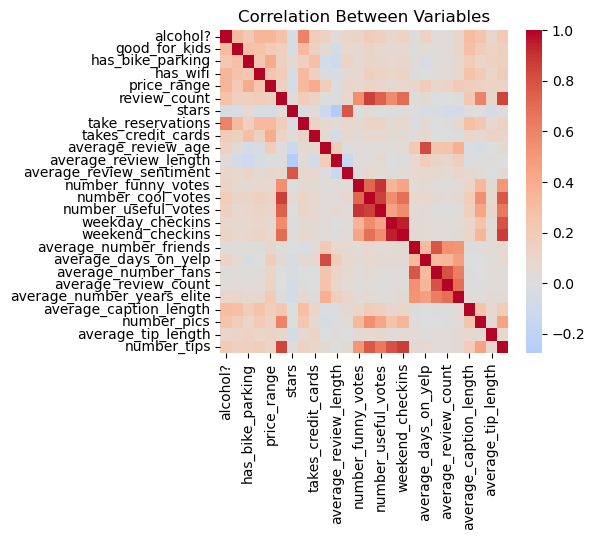

                         index     stars
0                     alcohol? -0.043332
1                good_for_kids -0.030382
2             has_bike_parking  0.068084
3                     has_wifi -0.039857
4                  price_range -0.052565
5                 review_count  0.032413
6                        stars  1.000000
7            take_reservations -0.024486
8           takes_credit_cards  0.037748
9           average_review_age -0.125645
10       average_review_length -0.277081
11    average_review_sentiment  0.782187
12          number_funny_votes  0.001320
13           number_cool_votes  0.043375
14         number_useful_votes -0.000066
15            weekday_checkins  0.004130
16            weekend_checkins  0.007863
17      average_number_friends -0.007629
18        average_days_on_yelp -0.038061
19         average_number_fans -0.031141
20        average_review_count -0.066572
21  average_number_years_elite -0.064419
22      average_caption_length  0.000040
23              

In [28]:
correlations = fulldat.corr() #evaluating the correlations between variables

#plot of correlation between any two variables in the data
plt.figure(figsize=(6, 5.5))
sns.heatmap(correlations, annot=False, cmap='coolwarm', center=0) #plotting as a heatmap
plt.title("Correlation Between Variables")
plt.tight_layout()
plt.show()

#isolation of the correlation to the relevant dependent variable "stars", representing the number of stars an establishment has on yelp
corr_with_stars = correlations['stars'].reset_index()
print(corr_with_stars)

**Now**, let's put these in descending order based on the absolute value of correlation to 'stars'. Of course, 'stars' will have a 100% correlation with itself:

In [30]:
#sorting the absolute value of correlation with the "stars" variable
corr_highest = corr_with_stars.reindex(corr_with_stars['stars'].abs().sort_values(ascending=False).index).reset_index(drop=True)

#corr_highest.sort_values(by = 'stars', ascending = False)
print(corr_highest)

                         index     stars
0                        stars  1.000000
1     average_review_sentiment  0.782187
2        average_review_length -0.277081
3           average_review_age -0.125645
4             has_bike_parking  0.068084
5         average_review_count -0.066572
6   average_number_years_elite -0.064419
7           average_tip_length -0.052899
8                  price_range -0.052565
9            number_cool_votes  0.043375
10                    alcohol? -0.043332
11                    has_wifi -0.039857
12        average_days_on_yelp -0.038061
13          takes_credit_cards  0.037748
14                review_count  0.032413
15         average_number_fans -0.031141
16               good_for_kids -0.030382
17           take_reservations -0.024486
18                 number_tips  0.014038
19            weekend_checkins  0.007863
20      average_number_friends -0.007629
21            weekday_checkins  0.004130
22                 number_pics  0.001727
23          numb

With these in descending order, we can draw **scatterplots** of each independent variable on the x-axis and rating on the y-axis. These might not be as enlightening as we want, both because certain values are binary (or at specific integer values) and the data itself is quite dense, with many restaurants included in each plot.

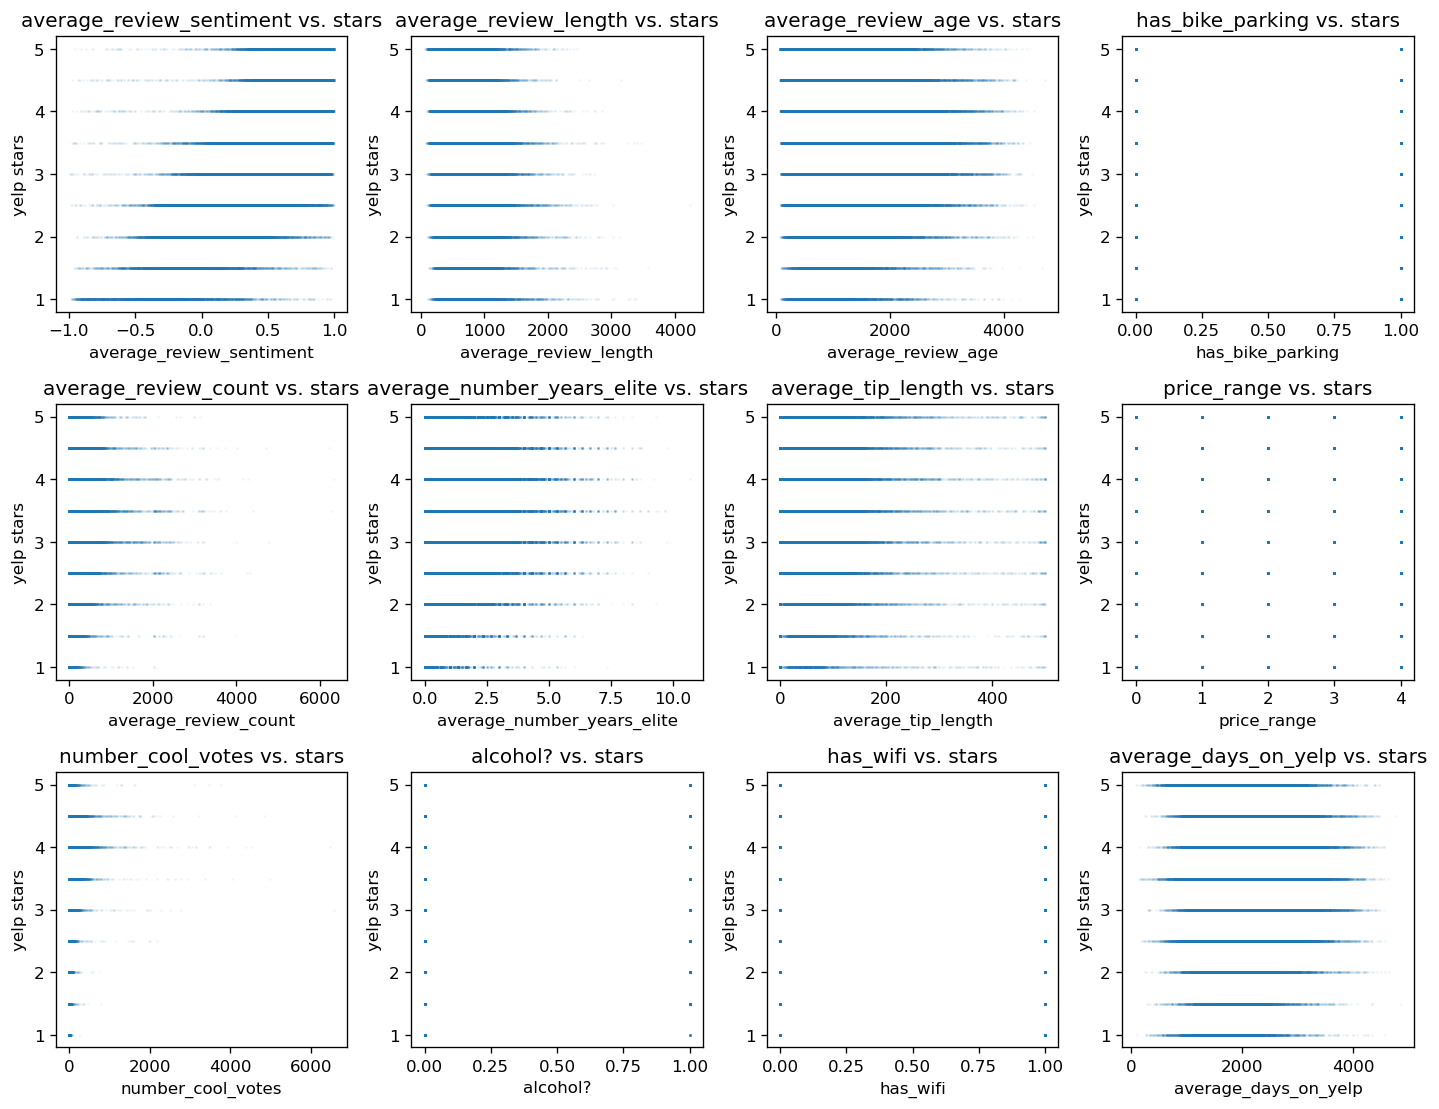

In [32]:
yvals = fulldat['stars'] #y-value = review rating
sub_i = 1

#creating scatterplots
fig = plt.figure(figsize=(12,12),dpi=120)
for i in range(12):
    ind = i+1 #skipping 'stars'
    xname = corr_highest['index'][ind]
    xvals = fulldat[xname]
    plt.subplot(4,4,ind)
    plt.scatter(xvals,yvals,s=0.5,alpha=0.05)
    plt.xlabel(xname)
    plt.ylabel('yelp stars')
    plt.title(xname + ' vs. stars')
    sub_i += 1

plt.tight_layout()
plt.show()

### Feature Selection

Because of the binary and integer nature of the data, it is very difficult to see these correlations visually using these scatterplots. We have used a blending value 'alpha' of 0.05 to more clearly show the denser regions of the plots, which does allow us to see some correlation, especially with the first few included plots. For example, as one might expect, higher review sentiment correlates with higher stars on yelp, which is clearly visible in the first subplot here. 

Using the measured correlations with the number of yelp stars for each restaurant, however, will help us decide what we'd like to train our machine learning model on. Because we want to use this model to advise restaurants on how to maximize their average yelp review, we will train our primary model only on data that they are able to directly control. As a demonstration, we will also train a model on all variables with an absolute correlation value over 0.01.

In [34]:
#variables for the primary model - what the restaurant actually can control
vars1 = ['has_bike_parking','price_range','alcohol?','has_wifi','takes_credit_cards','good_for_kids','take_reservations']
print('List of variables for our primary model (model 1), to help restaurants make decisions about their establishments: \n \n', vars1, '\n')

#variables for the test model (includes all variables with correlation coefficient over 0.01)
vars2 = [corr_highest['index'][i] for i in range(corr_highest.shape[0]) if (abs(corr_highest['stars'][i]) > 0.01) and (corr_highest['index'][i] != 'stars')]
print('List of variables for additional regression model (model 2, for demonstration): \n \n', vars2)

List of variables for our primary model (model 1), to help restaurants make decisions about their establishments: 
 
 ['has_bike_parking', 'price_range', 'alcohol?', 'has_wifi', 'takes_credit_cards', 'good_for_kids', 'take_reservations'] 

List of variables for additional regression model (model 2, for demonstration): 
 
 ['average_review_sentiment', 'average_review_length', 'average_review_age', 'has_bike_parking', 'average_review_count', 'average_number_years_elite', 'average_tip_length', 'price_range', 'number_cool_votes', 'alcohol?', 'has_wifi', 'average_days_on_yelp', 'takes_credit_cards', 'review_count', 'average_number_fans', 'good_for_kids', 'take_reservations', 'number_tips']


In [35]:
#training variables for model 1
X1 = fulldat[vars1]
#training variables for model 2
X2 = fulldat[vars2]
#dependent variable
y = fulldat['stars']

## Part 4 - Creating The Multiple Linear Regression Models

### 4.1 - Test/Train Split

Now that we've selected the variables we'll be using to train our regression model, we need to break them up into training sets and test sets, so that we both train and evaluate our model performance. As is a standard starting point, we'll use 80% for the training set and 20% for the test set.

In [37]:
X1train, X1test, y1train, y1test = train_test_split(X1, y, test_size=0.2) #train-test split for model 1
X2train, X2test, y2train, y2test = train_test_split(X2, y, test_size=0.2) #train-test split for model 2

With the data split, we can create and fit our models to the data:

In [39]:
#training model 1
model1 = LinearRegression()
model1.fit(X1train,y1train)

#training model 2
model2 = LinearRegression()
model2.fit(X2train,y2train)

LinearRegression()

And with the models fit to our chosen data, we can evaluate their performance:

In [41]:
#printing R^2 values for both models based on test data
print(r"Our R-squared value for model 1 is: ", model1.score(X1test,y1test))
print(r"Our R-squared value for model 2 is: ", model2.score(X2test,y2test))

Our R-squared value for model 1 is:  0.018466602198404902
Our R-squared value for model 2 is:  0.6817017892428068


So, our more limited model including only the variables the restaurant can directly influence does not do a great job of predicting the resulting yelp rating. Instead, all of the additional data, including the 'review sentiment' and 'review length', is more predictive. 

What would happen if we instead select for factors that are related to user engagement, or metrics connected to the reviews themselves rather than minor differences in how the restaurants are run. We will try that next in a third model.

(Note: we aren't including average review sentiment here, because that naturally would have a direct correlation with the stars given in the individual reviews)

In [43]:
#variables for a third model based on customer engagement
vars3 = ["average_review_length","average_review_age","average_review_count",\
         "average_number_years_elite","number_cool_votes","average_days_on_yelp",\
         "review_count"]

#separating relevant data and completing a train-test split
X3 = fulldat[vars3]
X3train, X3test, y3train, y3test = train_test_split(X3, y, test_size=0.4)

#training model 3
model3 = LinearRegression()
model3.fit(X3train,y3train)

#resultant r-value
print(r"Our R-squared value for model 3 is: ", model3.score(X3test,y3test))

#making a table of R^2 values for all three models (using a new dataframe)
results = pd.DataFrame({
    "Model": ["Model 1 (Directly Controllable)",
              "Model 2 (All Correlated Variables)",
              "Model 3 (Engagement Parameters)"],
    "Test R^2": [
        model1.score(X1test,y1test),
        model2.score(X2test,y2test),
        model3.score(X3test,y3test)
    ]
})

#show results (only works in jupyter, would need to print in a .py file)
results

Our R-squared value for model 3 is:  0.10207098697281003


,Model,Test R^2
0,Model 1 (Directly Controllable),0.018467
1,Model 2 (All Correlated Variables),0.681702
2,Model 3 (Engagement Parameters),0.102071


So user engagement appears more predictive than for the few directly controllable variables in this dataset. Before we draw our conclusions however, we should look at the regression coefficients for our three models.

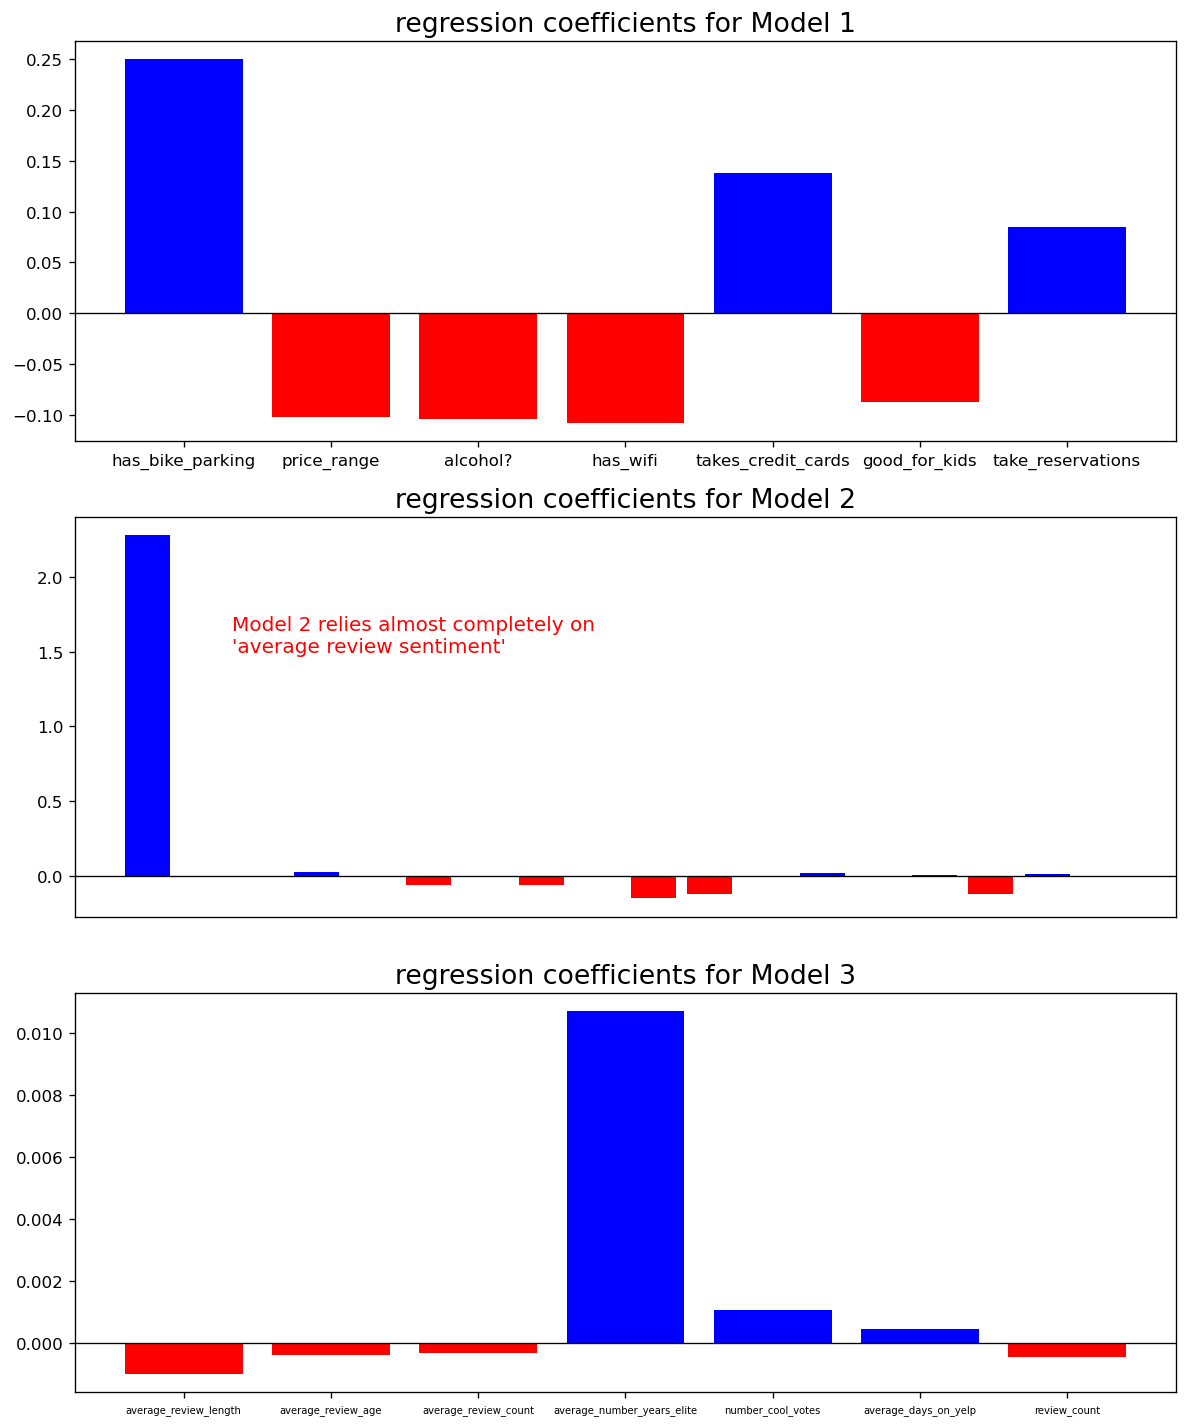

In [45]:
#color based on positive or negative correlation
colors1 = ['blue' if v >= 0 else 'red' for v in model1.coef_]
colors2 = ['blue' if v >= 0 else 'red' for v in model2.coef_]
colors3 = ['blue' if v >= 0 else 'red' for v in model3.coef_]

#plot a bar-chart of correlation for each variable of all three models
fig = plt.figure(figsize=(10,12),dpi=120)
plt.subplot(3,1,1)
plt.title('regression coefficients for Model 1', fontsize = 16)
plt.bar(vars1,model1.coef_,color=colors1)
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(fontsize = 10)
ax = plt.subplot(3,1,2)
#use a custom annotation to clarify the meaning of the model 2 bar chart
ax.text(1.5,1.5, "Model 2 relies almost completely on \n'average review sentiment'", fontsize = 12, color = 'r')
plt.title('regression coefficients for Model 2', fontsize = 16)
plt.bar(vars2,model2.coef_,color=colors2)
plt.axhline(0, color='black', linewidth=0.8)
#too many variables in model 2 to include the individual names
plt.xticks([],fontsize = 3)
plt.subplot(3,1,3)
plt.title('regression coefficients for Model 3', fontsize = 16)
plt.bar(vars3,model3.coef_,color=colors3)
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(fontsize = 6)
plt.tight_layout()
plt.show()

And the $R^2$ value for each of the three models plotted together clearly demonstrates the difference in accuracy of the three models:

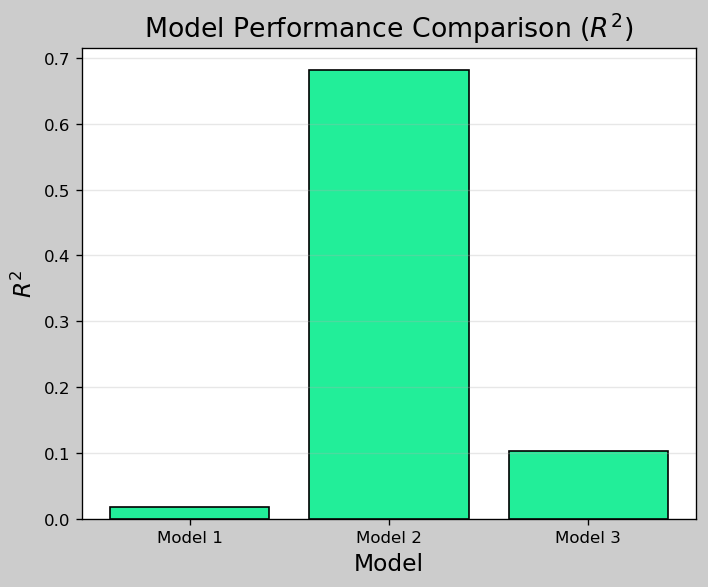

In [47]:
#bar chart of each model's R^2 result for direct visual comparison
fig = plt.figure(figsize=(6,5),dpi=120)
fig.patch.set_facecolor('#cccccc')
ax = plt.subplot(1,1,1)
plt.bar(['Model 1', 'Model 2', 'Model 3'], results["Test R^2"], color='#22ee99',edgecolor='k')
plt.title(r"Model Performance Comparison ($R^2$)", fontsize = 16)
plt.ylabel(r"$R^2$",fontsize=14)
plt.xlabel("Model", fontsize = 14)
ax.grid(axis='y',alpha = 0.3)
plt.tight_layout()
plt.savefig("Model_Performance.png",dpi=300)
plt.show()

## Conclusions

- **Model 1 (Directly Controllable Variables):** Very low predictive power ($R^2$ ~ 0.02). Factors such as bike parking, payment methods, and kid-friendliness do not directly cause meaningful variation in restaurant ratings.
- **Model 2 (All Correlated Variables): Higher predictive power ($R^2$ ~ 0.68), but dominated by the <u>average review sentiment</u>, which is trivial since it directly reflects how people rated the restaurant.
- **Model 3 (Engagement Variables):** Moderate predictive power ($R^2$ ~ 0.1). Factors related to customer engagement (review count, reviewer activity, elite years, etc.) matter more than the minor amenities included in Model 1.

Overall, the results from these models suggest that **user engagement is more predictive of Yelp ratings than the minor operational choices included in the dataset**. However, engagement alone will not directly influence the quality of individual reviews. Instead, factors not included in the dataset (atmosphere, service, and food quality) must still be a focus to drive long-term customer satisfaction.

## Suggestion for future Analysis

- Apply **Natural Language Processing (NLP)** to the actual text of reviews to identify keywords and themes most strongly associated with positive or negative reviews
- Explore nonlinear or regularized models (decision trees, random forests, lasso regression) to capture more complex relationships
- Investigate potential biases in Yelp data (reviewer demographics, location effects, etc.) that could also influence results

## Practical Recommendations for Restaurants

- **Encourage engagement:** Find ways to increase review activity through loyalty programs, events or incentives to increase customer buzz
- **Cover the basics:** Offer essential amenities (credit card payments, reservations, bike parking). Although their effect is small, they remove a few barriers to recieving positive reviews.
- **Focus on intangibles:** Service quality, food and atmosphere are not directly measurable via this dataset but are nonetheless essential for increased Yelp ratings
